In [56]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
eco = pd.read_csv('Datathon Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')

In [3]:
eco

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010
...,...,...,...,...,...,...,...,...
98015,18 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),39.7%,±0.4,2021
98016,18 to 64 years,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.1%,±0.4,2021
98017,65 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),38.5%,±0.5,2021
98018,People in families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.0%,±0.4,2021


In [4]:
np.array(eco['Label (Grouping)'])

array(['EMPLOYMENT STATUS', 'Population 16 years and over',
       '\xa0\xa0\xa0\xa0In labor force', ..., '65 years and over',
       '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0People in families',
       'Unrelated individuals 15 years and over'], dtype=object)

In [5]:
category = np.array(eco['Category'])

In [6]:
# from category get those about Income
pattern = r'INCOME'
ind_list = []
for i in range(len(category)):
    
    if re.findall(pattern,category[i]):
        if len(ind_list) == 0 or abs(ind_list[-1] - i) > 1:
            ind_list.append(i-1)
        ind_list.append(i)


In [7]:
income_df = eco.iloc[ind_list,:]

In [15]:
print(eco)

                              Label (Grouping)  \
0                            EMPLOYMENT STATUS   
1                 Population 16 years and over   
2                               In labor force   
3                         Civilian labor force   
4                                     Employed   
...                                        ...   
98015                        18 years and over   
98016                           18 to 64 years   
98017                        65 years and over   
98018                       People in families   
98019  Unrelated individuals 15 years and over   

                                                Category        State  \
0                                                 Header      Alabama   
1                                      EMPLOYMENT STATUS      Alabama   
2                                      EMPLOYMENT STATUS      Alabama   
3                                      EMPLOYMENT STATUS      Alabama   
4                                 

In [9]:
cate_dict = {}
category = np.array(income_df['Category'])
state  = np.array(income_df['State'])
label = income_df['Label (Grouping)']
label = label.apply(lambda x: x.lstrip('\xa0'))
label = np.array(label)
for i in range(len(category)):
    if category[i] == 'Header':
        cate = label[i]
        s = state[i]
        cate_dict[(cate,s)] = pd.DataFrame(income_df.iloc[[i],:])
    else:
        cate_dict[(cate,s)] = pd.concat([cate_dict[(cate,s)],income_df.iloc[[i],:]])

In [10]:
for i in cate_dict.keys():
    print(i)

('INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)', 'Alabama')
('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL', 'Alabama')
('INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)', 'Alaska')
('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL', 'Alaska')
('INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)', 'Arizona')
('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL', 'Arizona')
('INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)', 'Arkansas')
('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL', 'Arkansas')
('INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)', 'California')
('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL', 'California')
('INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)', 'Colorado')
('PERC

## analyze income_state data

In [33]:
utah_income_2021 = cate_dict[('INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)', 'Utah')]

In [34]:
print(utah_income_2021)

                                        Label (Grouping)  \
96915  INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTE...   
96916                                   Total households   
96917                                  Less than $10,000   
96918                                 $10,000 to $14,999   
96919                                 $15,000 to $24,999   
96920                                 $25,000 to $34,999   
96921                                 $35,000 to $49,999   
96922                                 $50,000 to $74,999   
96923                                 $75,000 to $99,999   
96924                               $100,000 to $149,999   
96925                               $150,000 to $199,999   
96926                                   $200,000 or more   
96927                  Median household income (dollars)   
96928                    Mean household income (dollars)   
96929                                      With earnings   
96930                            Mean ea

In [35]:
x = np.array(utah_income_2021['Percent'].iloc[2:12])

In [36]:
sum([float(i[:-1]) for i in x])

99.9

In [40]:
df_12years = pd.DataFrame(columns = eco.columns)
for i in range(2010,2023):
    df = cate_dict[('INCOME AND BENEFITS (IN {} INFLATION-ADJUSTED DOLLARS)'.format(i), 'Utah')]
    df = df.iloc[1:12,:]
    df_12years = pd.concat([df_12years,df])
    

In [12]:
def if_certain_pattern_in_str(pattern,str):
    if re.findall(pattern,str,re.IGNORECASE):
        return True
    else:
        return False

In [48]:
df_12years

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
6436,Total households,INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"859,158","±2,763","859,158",(X),2010
6437,"Less than $10,000",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"41,865","±1,250",4.9%,±0.1,2010
6438,"$10,000 to $14,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"34,503","±1,342",4.0%,±0.2,2010
6439,"$15,000 to $24,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"76,493","±1,658",8.9%,±0.2,2010
6440,"$25,000 to $34,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"86,612","±1,907",10.1%,±0.2,2010
6441,"$35,000 to $49,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"134,217","±2,111",15.6%,±0.2,2010
6442,"$50,000 to $74,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"190,272","±2,718",22.1%,±0.3,2010
6443,"$75,000 to $99,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"123,648","±2,087",14.4%,±0.2,2010
6444,"$100,000 to $149,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"113,795","±1,819",13.2%,±0.2,2010
6445,"$150,000 to $199,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"31,718",±970,3.7%,±0.1,2010


In [55]:
less_10000 = df_12years.loc[df_12years['Label (Grouping)']=='Less than $10,000']

In [57]:
less_10000

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
6437,"Less than $10,000",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"41,865","±1,250",4.9%,±0.1,2010
13977,"Less than $10,000",INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTE...,Utah,"42,967","±1,339",4.9%,±0.2,2011
29057,"Less than $10,000",INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTE...,Utah,"44,942","±1,413",5.1%,±0.2,2012
21517,"Less than $10,000",INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTE...,Utah,"45,505","±1,558",5.1%,±0.2,2013
59217,"Less than $10,000",INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTE...,Utah,"45,335","±1,313",5.1%,±0.1,2014
51677,"Less than $10,000",INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTE...,Utah,"44,761","±1,340",4.9%,±0.1,2015
36597,"Less than $10,000",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTE...,Utah,"42,815","±1,345",4.7%,±0.1,2016
44137,"Less than $10,000",INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTE...,Utah,"41,568","±1,326",4.4%,±0.1,2017
74297,"Less than $10,000",INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTE...,Utah,"40,085","±1,512",4.2%,±0.2,2018
66757,"Less than $10,000",INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTE...,Utah,"37,711","±1,340",3.9%,±0.1,2019


Text(0.5, 1.0, 'Percent of less than $10000 in total household of Utah')

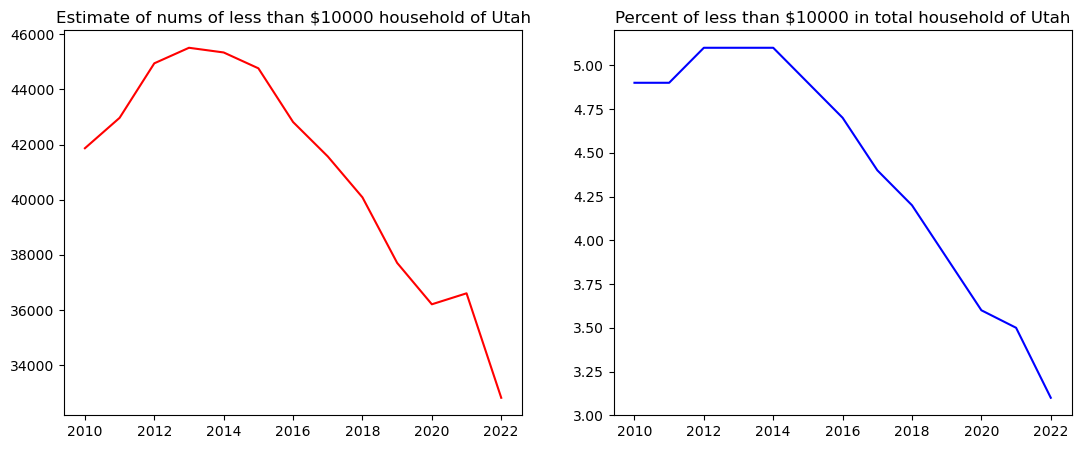

In [79]:
y1 = np.array([int(i[:2]+i[3:]) for i in less_10000['Estimate']])
y2 = np.array([float(i[:-1]) for i in less_10000['Percent']])
x = np.array(less_10000['Year'])
fig,ax = plt.subplots(1,2,figsize = (13,5))
ax[0].plot(x,y1,c='r')
ax[0].set_title('Estimate of nums of less than $10000 household of Utah')
ax[1].plot(x,y2,c = 'b')
ax[1].set_title('Percent of less than $10000 in total household of Utah')


In [63]:
ax.plot?

In [82]:
def get_12y_state_income_data(cate_dict,state_name,year_range):
    df_12years = pd.DataFrame(columns = eco.columns)
    for i in year_range:
        df = cate_dict[('INCOME AND BENEFITS (IN {} INFLATION-ADJUSTED DOLLARS)'.format(i), state_name)]
        df = df.iloc[1:12,:]
        df_12years = pd.concat([df_12years,df])
    return df_12years
get_12y_state_income_data(cate_dict,'Utah',range(2010,2023))

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
6436,Total households,INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"859,158","±2,763","859,158",(X),2010
6437,"Less than $10,000",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"41,865","±1,250",4.9%,±0.1,2010
6438,"$10,000 to $14,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"34,503","±1,342",4.0%,±0.2,2010
6439,"$15,000 to $24,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"76,493","±1,658",8.9%,±0.2,2010
6440,"$25,000 to $34,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"86,612","±1,907",10.1%,±0.2,2010
6441,"$35,000 to $49,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"134,217","±2,111",15.6%,±0.2,2010
6442,"$50,000 to $74,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"190,272","±2,718",22.1%,±0.3,2010
6443,"$75,000 to $99,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"123,648","±2,087",14.4%,±0.2,2010
6444,"$100,000 to $149,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"113,795","±1,819",13.2%,±0.2,2010
6445,"$150,000 to $199,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Utah,"31,718",±970,3.7%,±0.1,2010
